In [4]:
%matplotlib notebook

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
hdf3 = housing_df2.loc[housing_df2['SOURCE'] == 'Residential', : ]
hdf4 = hdf3.dropna(subset=['PRICE'])
hdf5 = hdf4.loc[hdf4['YEAR']> 1991, : ]
hdf6 = hdf5.loc[hdf5['YEAR']< 2018, : ]
hdf7 = hdf6[hdf6.FULLADDRESS != '10 N STREET SW']

#hdf7.to_csv('HousingDataTrim10Street.csv')
housing1 = hdf7

#hdf6.to_csv('HousingDataTrim.csv')
#housing = hdf6


C:\Users\djhon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
housing1['PRICE'].count()

54751

In [11]:
housing1.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS',
       'CITY', 'STATE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'QUADRANT', 'YEAR', 'MONTH'],
      dtype='object')

In [13]:
saleprice = housing1.groupby('QUADRANT')['PRICE'].mean().round(0)
saleprice

QUADRANT
NE    391198.0
NW    774445.0
SE    360984.0
SW    325338.0
Name: PRICE, dtype: float64

In [15]:
NEp1 = housing1.loc[housing['QUADRANT'] == 'NE', ['QUADRANT','PRICE','YEAR']]
NEp = NEp1.groupby('YEAR')['PRICE'].mean().round(0)

NWp1 = housing1.loc[housing['QUADRANT'] == 'NW', ['QUADRANT','PRICE','YEAR']]
NWp = NWp1.groupby('YEAR')['PRICE'].mean().round(0)

SEp1 = housing1.loc[housing['QUADRANT'] == 'SE', ['QUADRANT','PRICE','YEAR']]
SEp = SEp1.groupby('YEAR')['PRICE'].mean().round(0)

SWp1 = housing1.loc[housing['QUADRANT'] == 'SW', ['QUADRANT','PRICE','YEAR']]
SWp = SWp1.groupby('YEAR')['PRICE'].mean().round(0)
SWp

YEAR
1992.0    141728.0
1993.0     93169.0
1994.0    130343.0
1995.0    119500.0
1996.0    141000.0
1997.0    126907.0
1998.0    122850.0
1999.0    137624.0
2000.0    179637.0
2001.0    298970.0
2002.0    194861.0
2003.0    316889.0
2004.0    277225.0
2005.0    291407.0
2006.0    321133.0
2007.0    338988.0
2008.0    419088.0
2009.0    351328.0
2010.0    279130.0
2011.0    221484.0
2012.0    394316.0
2013.0    453359.0
2014.0    434243.0
2015.0    482701.0
2016.0    490875.0
2017.0    413640.0
Name: PRICE, dtype: float64

<IPython.core.display.Javascript object>


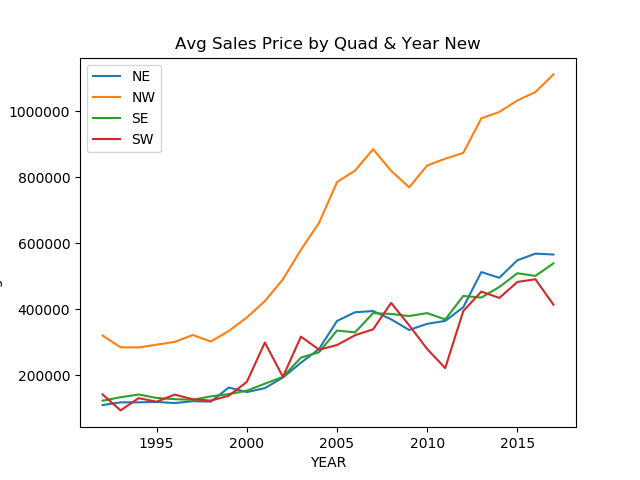

In [16]:
line_chart = NEp.plot(kind="line", label='NE', title="Avg Sales Price by Quad & Year New", grid=True)
line_chart = NWp.plot(kind="line", label='NW')
line_chart = SEp.plot(kind="line", label='SE')
line_chart = SWp.plot(kind="line", label='SW')

line_chart.set_xlabel("YEAR")
line_chart.set_ylabel("Avg Price of Sales")
plt.legend(loc="best")
plt.savefig('AvgPriceofSalesbyQuad&YearNew.png')
plt.show()

In [ ]:
#plt.clf()